# Predicción Univariada y Multivariada de los Principales Índices Financieros del Mundo

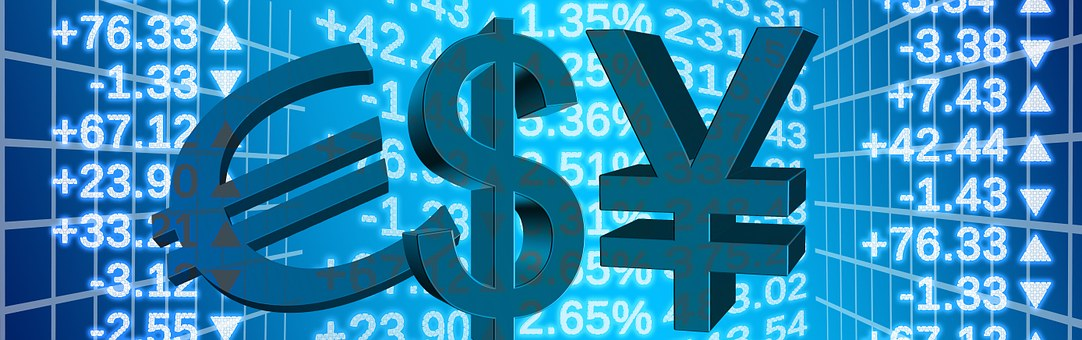

In [1]:
from IPython.display import Image
Image(filename='img/imagenStock.jpg' ,  width= 1280)

# Trabajo Práctico N°1: Análisis y Visualización

## Introducción

En este práctico se pretende obtener una primera aproximación al dataset bajo análisis. En primer lugar se cargan y presentan brevemente los datos. Luego se proponen las consignas a seguir para la resolución del mismo. 

### Carga del dataset

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [3]:
df_ = pd.read_csv("inputs/dataset.csv", index_col=0, parse_dates=True)
# los argumentos index_col=0 y parse_dates se emplean para que la columna FECHA sea usada como índice

In [4]:
df_.head()

,MERV,BVSP,GSPC,NDX,FTSE,GDAXI,FCHI,N225,HSI,SSEC,BSESN,DEXARUS,DEXBZUS,DEXUSUK,DEXUSEU,DEXJPUS,DEXHKUS,DEXCHUS,DOLAR_BLUE
FECHA,,,,,,,,,,,,,,,,,,,
1997-02-07,824.109985,13260.0,904.030029,975.929993,4751.399902,3867.530029,2909.500000,20196.41992,NaN,1199.06,4333.899902,0.9998,1.0767,1.6670,1.1223,114.52,7.7472,8.3210,NaN
1997-03-07,831.440002,13285.0,916.919983,986.520020,4831.700195,3939.729980,2937.000000,20121.41016,15055.70020,1150.62,4323.459961,0.9994,1.0778,1.6885,1.1242,113.46,7.7445,8.3214,NaN
1997-04-07,837.950012,13494.0,NaN,NaN,4812.799805,3946.729980,2934.500000,19968.00000,14823.00000,1159.34,4323.819824,0.9995,NaN,NaN,1.1230,NaN,NaN,NaN,NaN
1997-07-07,841.690002,13502.0,912.200012,991.039978,4810.700195,4003.350098,2947.699951,19705.16992,14858.59961,1096.82,4291.450195,0.9998,1.0779,1.6870,1.1226,112.60,7.7428,8.3218,NaN
1997-08-07,846.330017,13617.0,918.750000,1005.809998,4758.500000,4030.100098,2929.800049,19853.89063,14792.20020,1109.67,4306.390137,0.9999,1.0790,1.6885,1.1180,112.76,7.7436,8.3219,NaN


In [5]:
df_.tail()

,MERV,BVSP,GSPC,NDX,FTSE,GDAXI,FCHI,N225,HSI,SSEC,BSESN,DEXARUS,DEXBZUS,DEXUSUK,DEXUSEU,DEXJPUS,DEXHKUS,DEXCHUS,DOLAR_BLUE
FECHA,,,,,,,,,,,,,,,,,,,
2020-04-05,32387.27930,78876.0,2842.739990,8834.110352,5753.799805,10466.79981,4378.229980,NaN,23613.80078,NaN,31715.34961,66.8835,5.5714,1.2430,1.0908,106.82,7.7532,7.0622,110.0
2020-05-05,33546.51953,79471.0,2868.439941,8930.620117,5849.399902,10729.45996,4483.129883,NaN,23868.66016,NaN,31453.50977,66.9515,5.5623,1.2449,1.0840,106.52,7.7534,7.0622,110.0
2020-06-05,34158.89063,79064.0,2848.419922,8984.860352,5853.799805,10606.20020,4433.379883,NaN,24137.48047,2878.14,31685.75000,67.0475,5.6798,1.2347,1.0795,106.07,7.7520,7.1031,112.0
2020-07-05,35850.21094,78119.0,2881.189941,9101.879883,5936.000000,10759.26953,4501.439941,19674.76953,23980.63086,2871.52,31443.38086,67.1650,5.8027,1.2349,1.0834,106.36,7.7505,7.0825,112.0
2020-08-05,36183.89844,80263.0,2929.800049,9220.349609,NaN,10904.48047,4549.640137,20179.08984,24230.16992,2895.34,31642.69922,67.2750,5.7455,1.2436,1.0841,106.50,7.7512,7.0732,112.0


### Variables

- __FECHA__: se la usa como índice del _pandasDataFrame_

#### Índices (Valores al cierre de cada día):

- __MERV__: Merval (Argentina)
- __BVSPC__: Bovespa (Brasil)
- __GSPC__: Standard & Poors 500 (Estados Unidos)
- __NDX__: Nasdaq 100 (Estados Unidos)
- __FTSE__: FTSE 100 (Reino Unido)
- __GDAXI__: DAX 30 (Alemania)
- __FCHI__: CAC 40 (Francia)
- __N225__: Nikkei 225 (Japón)
- __HSI__: Hang Seng (China)
- __SSEC__: Shanghai Composite (China)
- __BSESN__: Bombay Stock Exchange (India)

#### Tipos de cambio:

- __DEXARUS__: cantidad de pesos argentinos necesarios para adquir un dólar estadounidense
- __DEXBZUS__: cantidad de reales necesarios para adquir un dólar estadounidense
- __DEXUSUK__: cantidad de dólares estadounidenses necesarios para adquir una libra esterlina
- __DEXUSEU__: cantidad de dólares estadounidenses necesarios para adquir un euro
- __DEXJPUS__: cantidad de yenes necesarios para adquir un dólar estadounidense
- __DEXHKUS__: cantidad de dólares hongkonenses necesarios para adquir un dólar estadounidense
- __DEXCHUS__: cantidad de yuanes chinos necesarios para adquirir un dólar estadounidense
- __DOLAR_BLUE__: serie de dolar blue, que se puede usar para corregir __DEXARUS__ en épocas de cepo cambiario. Surge de la combinación de dos series, una para el período 28/10/2011 - 16/12/2015 y otra para el período 01/09/2019 - 08/05/2020.

# Consignas del trabajo práctico N°1

El objetivo general del práctico es realizar una análsis exploratorio profundo de __sólo los índices__ del dataset, dado que las series de tipos de cambio serán usadas en el segundo práctico para expresar los índices en una moneda común. 
Se plantean algunas sugerencias para explorar las series en forma individual y conjunta por medio de medidas descriptivas y visualizaciones, con la finalidad de confeccionar un informe detallado sobre los índices analizados que sirva de base para, en practicos posteriores, modelar las series y hacer pronósticos.

Como las observaciones se encuentran indexadas en el tiempo, este tipo de datos se conocen como __series de tiempo__, por lo que algunas de las herramientas estadísticas habituales deben interpretarse con cierto cuidado y se pueden usar algunos recursos analíticos adicionales. El siguiente [tutorial](https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/) puede ser de gran ayuda para introducirse en la confección de algunos gráficos para series de tiempo y funcionalidades básicas de pandas para dicho tipo de datos.

## Fecha de entrega

- __Versión preliminar: 22/6__ 

- __Version final: 29/6__

## Condiciones de entrega

Realizar un informe en el cual se presenten los resultados y conclusiones del análisis realizado. El mismo debe estar pensado para un público técnico pero que desconoce los aspectos propios del problema a resolver tal como los compañeros de clase. Dicho informe puede ser un notebook, a condición de que en el mismo se efectúe un análisis escrito suficientemente detallado de los resultados. 



# Resolución

Como el objetivo general del práctico es analizar solo los índices del dataset, nos quedaremos con las columnas que se corresponden a índices. 

In [11]:
df = df_[df_.columns[:11]]

Por otro lado, ordenamos el índice del dataframe.

In [18]:
df = df.loc[df.index.sort_values()]

1) Determine el tipo de variables y el período de tiempo bajo análsis

**Tipos de las variables**

Vemos que todas las variables son numéricas. Esto es bueno desde el punto de vista de la curación de datos, ya que no tenemos que esforzarnos en corregir nada aún.

In [19]:
df.dtypes

MERV     float64
BVSP     float64
GSPC     float64
NDX      float64
FTSE     float64
GDAXI    float64
FCHI     float64
N225     float64
HSI      float64
SSEC     float64
BSESN    float64
dtype: object

El tipo de dato del índice (FECHA) es `<M8[ns]` lo que hace referencia a una fecha `datetime64[ns]`

In [20]:
df.index.dtype

dtype('<M8[ns]')

Periodo de análisis

In [21]:
print(f'El periodo de análisis es de {df.index.min()} a {df.index.max()}.')

El periodo de análisis es de 1997-01-08 00:00:00 a 2020-12-04 00:00:00.


2) Indague sobre la existencia de valores faltantes. ¿Hay observaciones los fines de semana?. ¿Cómo trataría a los faltantes? ¿Por qué? (el tratamiento de los valores faltantes se hará en el proximo práctico, por lo que en lo que sigue use las series que surgen de omitirlos)

Mostramos la cantidad de valores faltantes por columna ordenados de mayor a menor.

In [22]:
df.isnull().sum().sort_values(ascending=False)

SSEC     494
MERV     442
N225     438
BSESN    417
HSI      408
BVSP     384
NDX      286
GSPC     286
FTSE     277
GDAXI    245
FCHI     211
dtype: int64

A continuación podemos visualizar los datos faltantes.

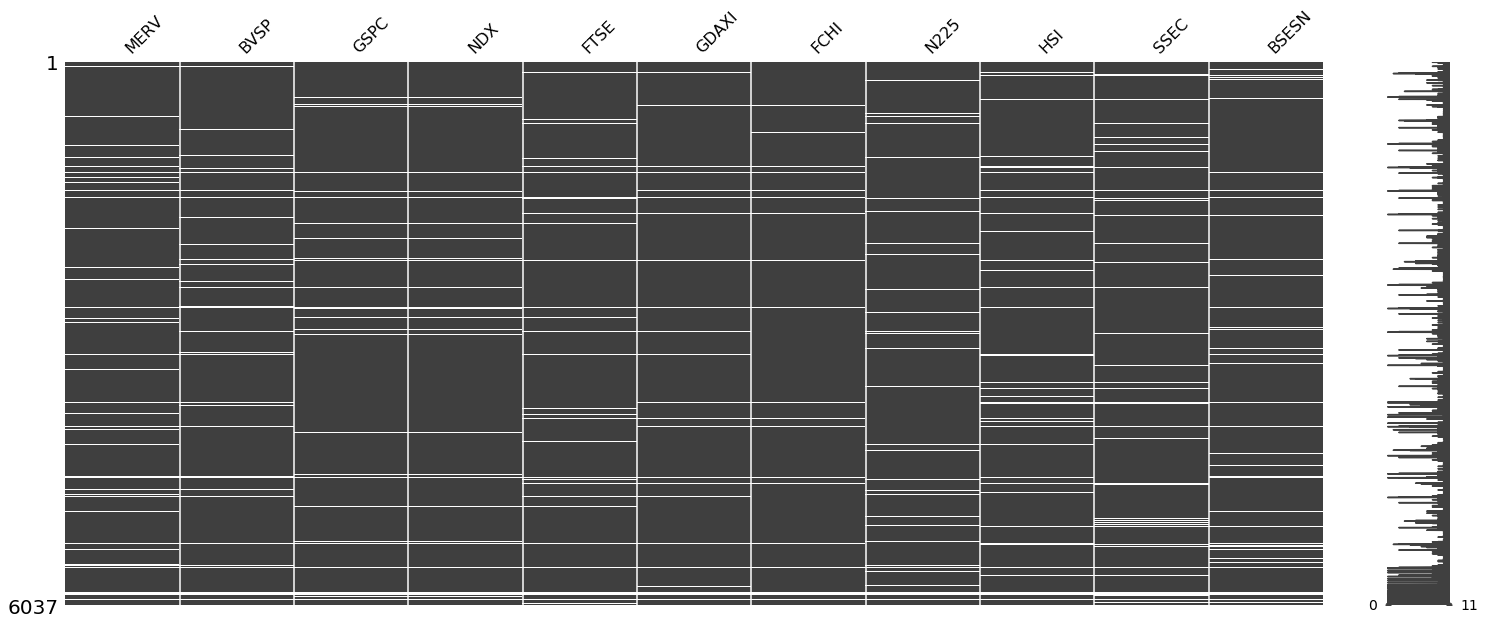

In [23]:
import missingno as msno
msno.matrix(df) 

Los días 5 y 6 de la semana son sábados y domingos. Por lo que podemos observar que **sí hay observaciones los fines de semana** aunque en algunas filas haya valores nulos para algunos o todos los índices. 

In [24]:
df[df.index.dayofweek >= 5]

,MERV,BVSP,GSPC,NDX,FTSE,GDAXI,FCHI,N225,HSI,SSEC,BSESN
FECHA,,,,,,,,,,,
1997-01-12,680.289978,9648.0,974.770020,1079.229980,4921.799805,4125.919922,2918.500000,17007.58984,10750.90039,1133.09,3569.649902
1997-02-09,826.830017,11063.0,927.580017,1102.750000,4952.200195,4127.279785,2921.199951,18232.51953,13735.29981,1226.30,3950.030029
1997-03-09,834.179993,11119.0,927.859985,1100.439941,4976.899902,4062.129883,2918.000000,18735.16992,14714.00000,1240.82,3965.389893
1997-04-12,712.580017,10046.0,973.099976,1052.760010,5082.299805,4159.720215,2914.500000,16306.79004,11474.90039,1135.87,3527.100098
1997-05-11,681.119995,9988.0,942.760010,1046.920044,4908.299805,3841.389893,2822.399902,16448.05078,10681.79981,1194.04,3778.229980
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,41016.019530,116247.0,3253.050049,8912.370117,7574.899902,13320.179690,6031.000000,23204.75977,28087.91992,3066.89,40817.738280
2020-08-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-03,32832.261720,92214.0,2882.229980,8372.269531,5960.200195,10475.490230,4636.609863,19867.11914,25392.50977,2996.76,NaN


3) Analice las distribuciones por medio de gráficos (por ejemplo: histogramas y boxplots) y medidas de estadística descriptiva (por ejemplo: media, varianza y coeficiente de variación). No olvide el análisis de los coeficientes de asimetría y kurtosis.

**Medidas de estadísticas descriptivas**

In [26]:
for col in df.columns:
    print('\n',col,'\n')
    mean = df[col].mean()
    var = df[col].var()
    std = df[col].std()
    coef = std/mean
    print('MEDIA: ', mean)
    print('VARIANZA: ', var)
    print('COEFICIENTE DE VARIACION: ', coef, '=>', coef * 100, '%')


 MERV 

MEDIA:  6890.289940792129
VARIANZA:  106479666.88394544
COEFICIENTE DE VARIACION:  1.4976000457495098 => 149.76000457495098 %

 BVSP 

MEDIA:  44262.57933840439
VARIANZA:  686943633.5516042
COEFICIENTE DE VARIACION:  0.5921392281424238 => 59.21392281424238 %

 GSPC 

MEDIA:  1550.3540161304088
VARIANZA:  354020.24413258815
COEFICIENTE DE VARIACION:  0.383780734766899 => 38.3780734766899 %

 NDX 

MEDIA:  2974.2874359721723
VARIANZA:  3937303.2764117857
COEFICIENTE DE VARIACION:  0.6671392579600532 => 66.71392579600533 %

 FTSE 

MEDIA:  5878.13779372796
VARIANZA:  959271.7558613808
COEFICIENTE DE VARIACION:  0.16662151015279217 => 16.662151015279218 %

 GDAXI 

MEDIA:  7224.943425857559
VARIANZA:  8232066.571626945
COEFICIENTE DE VARIACION:  0.39711837818305434 => 39.71183781830543 %

 FCHI 

MEDIA:  4389.669302054389
VARIANZA:  852300.345297968
COEFICIENTE DE VARIACION:  0.2103122300773173 => 21.031223007731732 %

 N225 

MEDIA:  14582.497111208235
VARIANZA:  18557307.2328178

Añadimos como columna el año

In [27]:
df['YEAR'] = df.index.year
year_range = df['YEAR'].max() - df['YEAR'].min()
year_segment = pd.cut(df['YEAR'], bins=year_range)
df['YEAR_SEGMENT'] = year_segment

Graficamos histograma y función de distribución en intervalos de un año gracias al rango de años

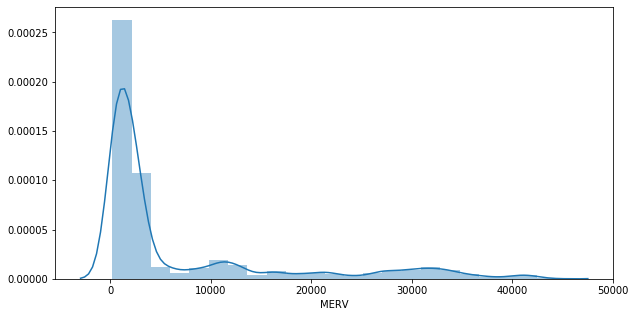

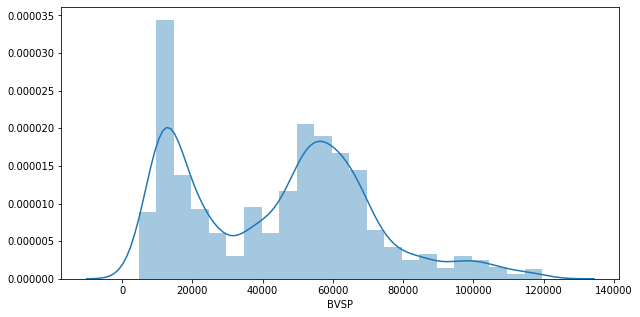

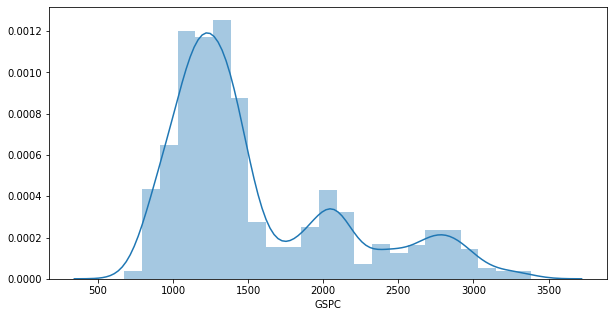

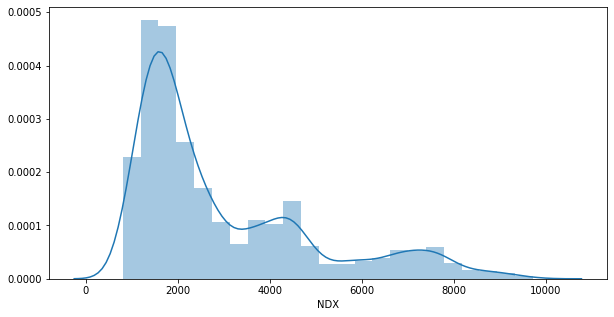

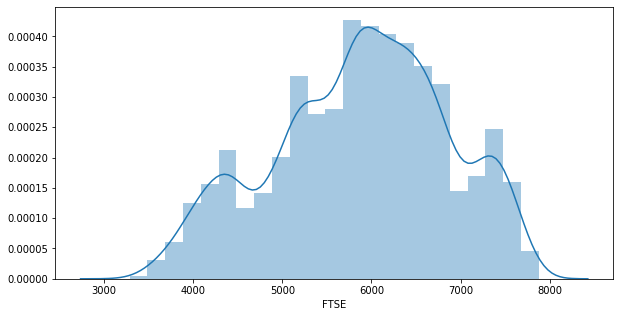

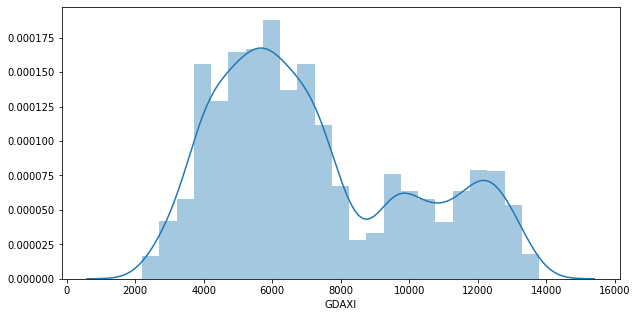

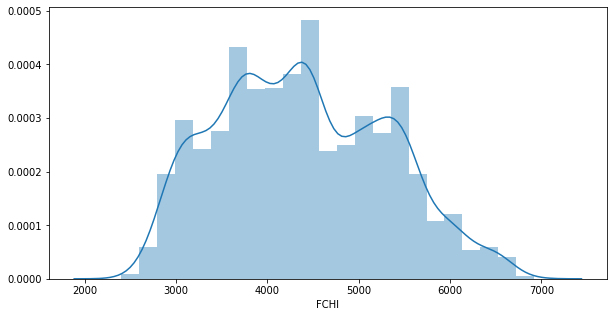

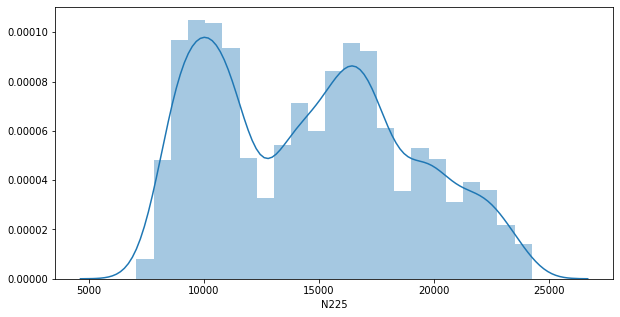

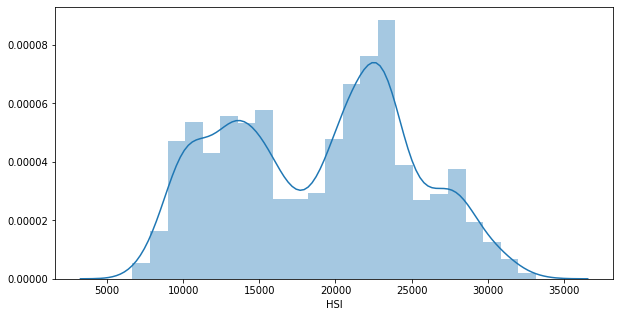

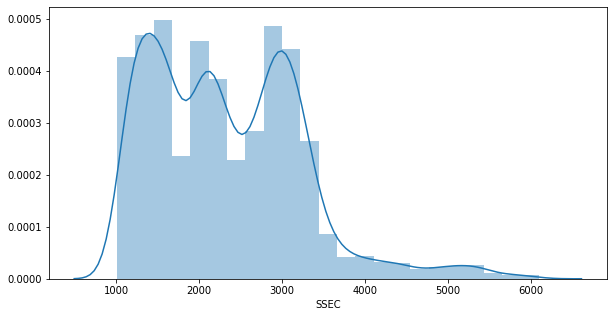

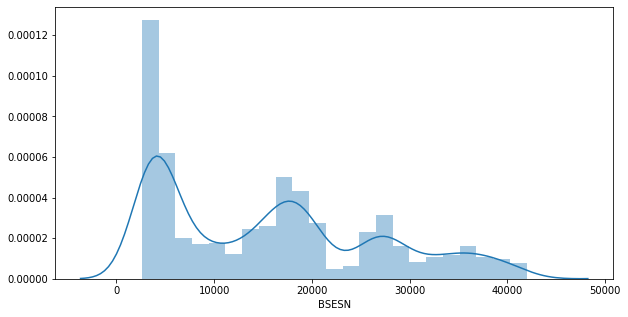

In [31]:
plt.rcParams['figure.figsize']=10,5

columns = [col for col in df.columns if col not in ['YEAR', 'YEAR_SEGMENT']]
for col in columns:
    sns.distplot(df[col].dropna(), bins=year_range)
    #plt.xlabel("Moneda del país")
    plt.show()

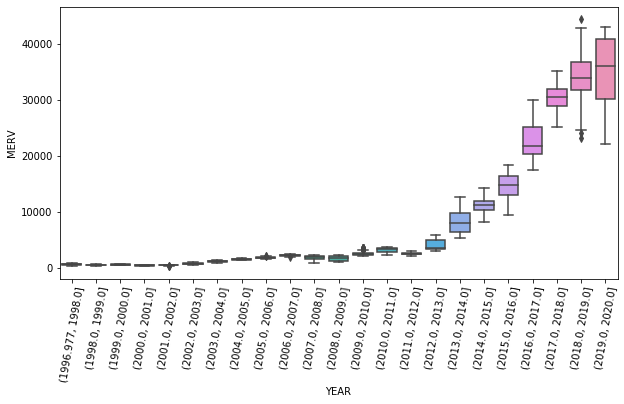

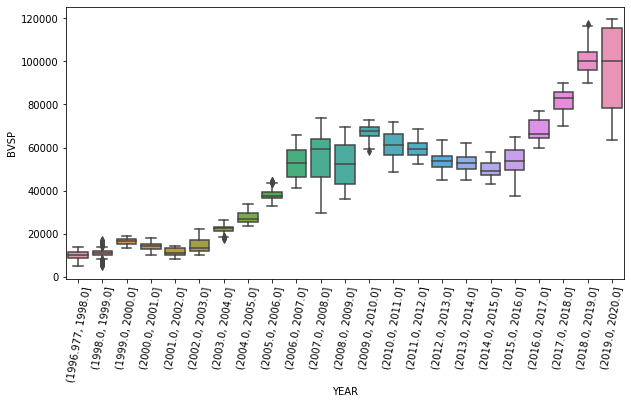

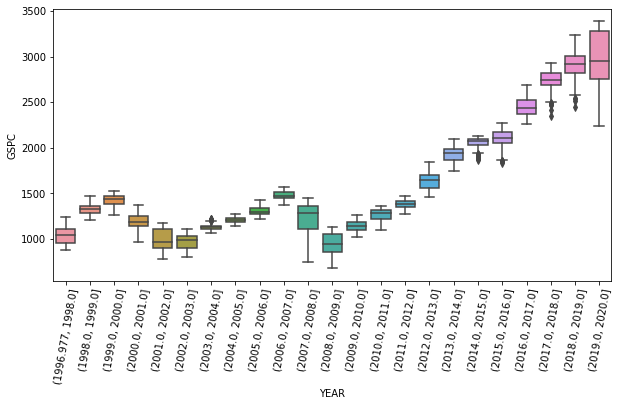

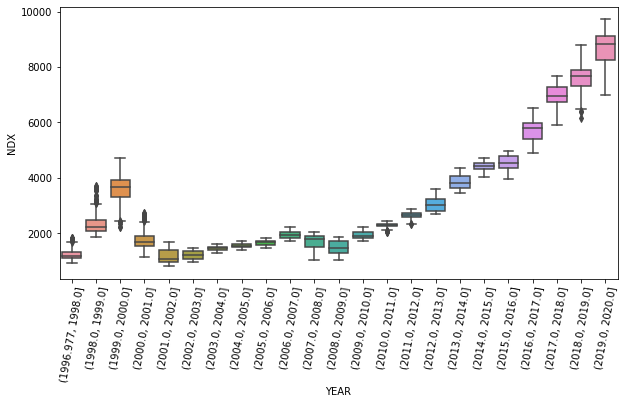

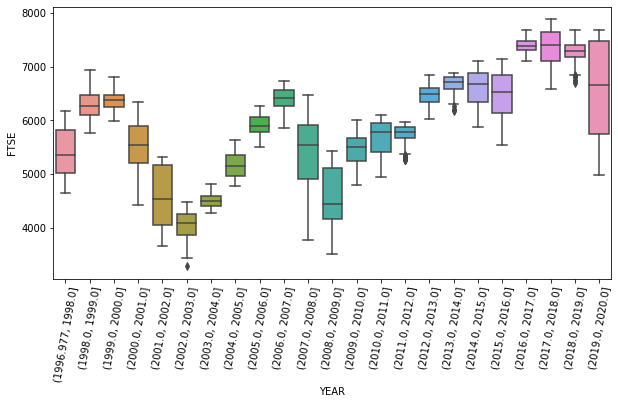

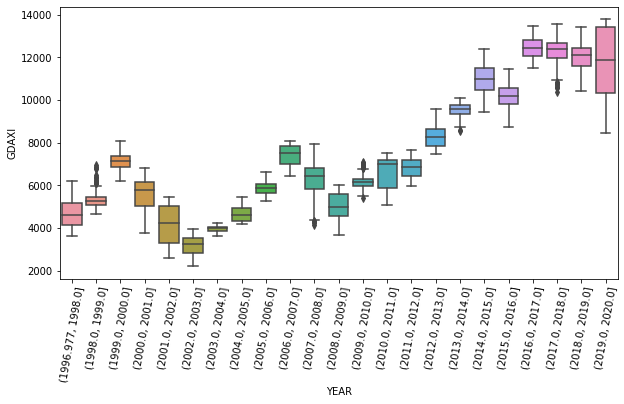

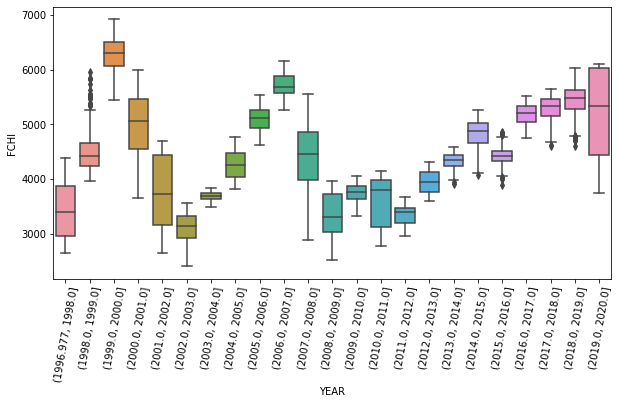

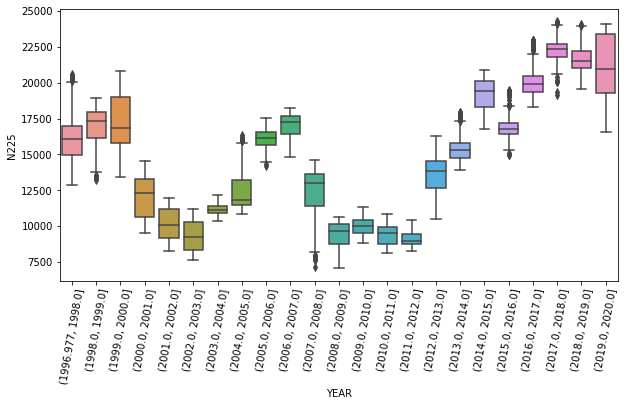

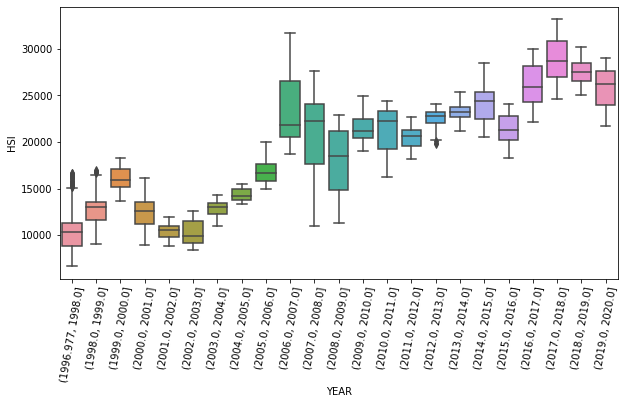

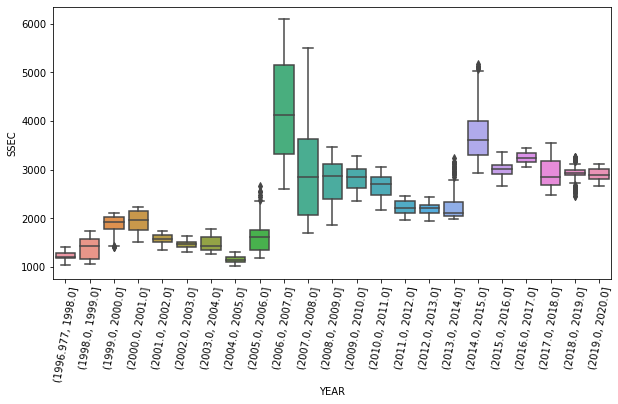

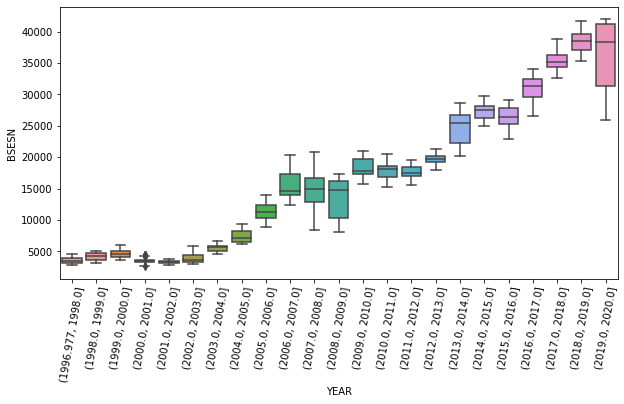

In [32]:
plt.rcParams['figure.figsize']=10,5

for col in columns:
    sns.boxplot(data=df, x=year_segment, y=col)
    plt.xticks(rotation=80)
    plt.show()

4) ¿Hay outliers? Si es así, ¿qué sugiere hacer con ellos?

Mirando los datos a nivel global, no se ven muchos outliers. En especial en el boxplot, pueden observarse algunos puntos que están alejados de su media, pero no se observa magnitud tal que sugieran errores en la carga de los datos. Analizando más en profundidad, por ejemplo en la serie de "Dólar Blue", podemos ver algunos outliers. Pero estos valores, no son errores, sino que se deben a la inestabilidad del valor del dólar blue. Por lo tanto, **se sugiere no quitar estos valores**. (Al considerar solo los índices, este cometario debería excluirse ¿?)

In [33]:
def find_outliers(data, selected_index, year, number_of_stds):
    """Returns ouliers based on a number of standard deviations from the mean (number_of_stds) for a given column (selected_score)
    for a given year (year)
    """
    outliers = []
    # Filtro por año
    filtro = data[data["YEAR"].isin([year])]
    datos = filtro[selected_index]
    media = datos.mean()
    varianza = datos.std()
    #print("Media: ", media, "Varianza: ", varianza)
    for i in datos:
        if np.abs(i-media) > number_of_stds*varianza:
            outliers.append(i)    
    return outliers

#find_outliers(df,"DOLAR_BLUE",2020,2.5)

In [34]:
for indice in df.columns.drop(['YEAR', 'YEAR_SEGMENT']):
    print()
    for year in range(1970, 2020):
        num_outliers = len(find_outliers(df,indice,year,2.5))
        if num_outliers > 0:
            print('Para el índice {}, en el año {} se encontraron {} valores outliers.'.format(indice, year, num_outliers))


Para el índice MERV, en el año 2006 se encontraron 2 valores outliers.
Para el índice MERV, en el año 2007 se encontraron 1 valores outliers.
Para el índice MERV, en el año 2010 se encontraron 2 valores outliers.
Para el índice MERV, en el año 2019 se encontraron 1 valores outliers.

Para el índice BVSP, en el año 1999 se encontraron 7 valores outliers.
Para el índice BVSP, en el año 2004 se encontraron 1 valores outliers.
Para el índice BVSP, en el año 2006 se encontraron 2 valores outliers.
Para el índice BVSP, en el año 2010 se encontraron 2 valores outliers.
Para el índice BVSP, en el año 2019 se encontraron 4 valores outliers.

Para el índice GSPC, en el año 1997 se encontraron 1 valores outliers.
Para el índice GSPC, en el año 2000 se encontraron 2 valores outliers.
Para el índice GSPC, en el año 2001 se encontraron 1 valores outliers.
Para el índice GSPC, en el año 2004 se encontraron 5 valores outliers.
Para el índice GSPC, en el año 2011 se encontraron 1 valores outliers.
Par

5) Seleccione un índice y grafique un boxplot para cada año. ¿Se mantiene inalterada en el tiempo la distribución?

En el punto anterior pudimos ver gráficos de cajas para los distintos años de los distintos índices. Podemos ver que **no se mantiene inalterada la distribución** a lo largo de los años, sino que va fluctuando.

6) Explore la existencia de estacionalidad.

Una serie se puede ver como un proceso estacionario si:
1. Su media es constante en el tiempo.
2. Su varianza es constante en el tiempo.
3. Su estructura de autocorrelación es constante en el tiempo.

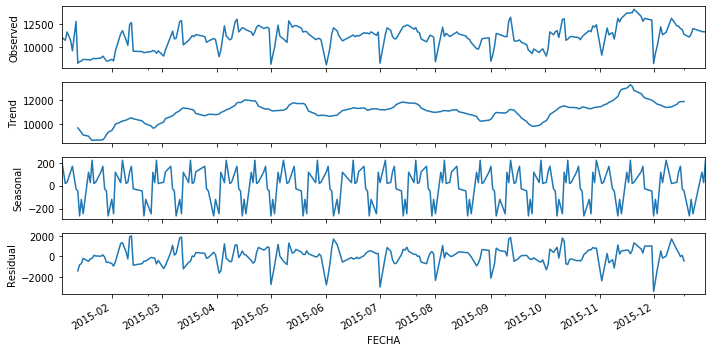

In [35]:
#Probando!!
#Aqui se podria usar el metodo seasonal_decompose y tomar Seasonal ¿?
index_sort = df.index.sort_values()
df = df.loc[index_sort]

from statsmodels.tsa.seasonal import seasonal_decompose
decomp_results = seasonal_decompose(df['MERV'][df['MERV'].index.year == 2015].dropna(), freq=12)
type(decomp_results)
decomp_results.plot()
plt.show()

7) Estudie la evolución temporal de los índices. ¿En qué sentido tienden a moverse? ¿Hay períodos de crisis(caídas fuertes y repentinas de los índices)? ¿Coinciden con las noticias? ¿Los índices tienden a moverse en forma conjunta?  En caso de que existan crisis, ¿son globales o propias de mercados individuales? 

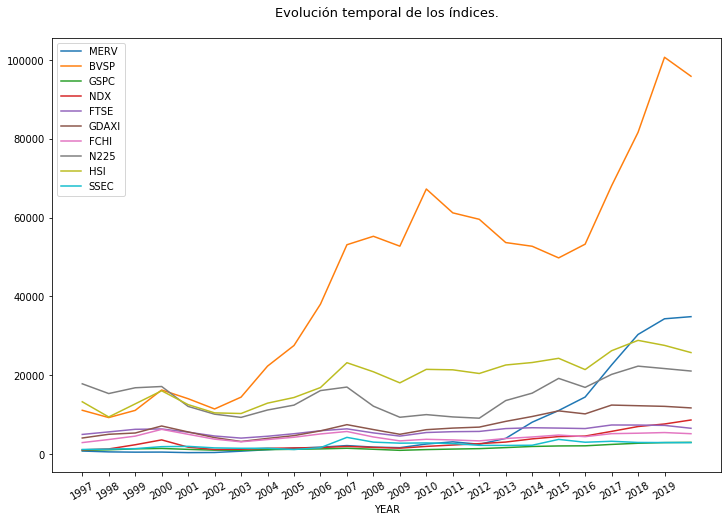

In [37]:
selected_indexes = ["MERV", "BVSP", "GSPC", "NDX", "FTSE", "GDAXI", "FCHI", "N225", "HSI", "SSEC", "YEAR"]
data = df[selected_indexes]
new_data = data.groupby(["YEAR"]).mean()
plt.figure(figsize=(12,8))
ax = sns.lineplot(data=new_data, hue= ["MERV", "BVSP", "GSPC", "NDX", "FTSE", "GDAXI", "FCHI", "N225", "HSI", "SSEC"], dashes=False)
#seaborn.despine()
ax.set_xticks(np.arange(data["YEAR"].min(), data["YEAR"].max(), step=1))
plt.title("Evolución temporal de los índices.\n", fontdict={'fontsize': 13})
plt.xticks(rotation=30)
plt.show()

### CRISIS
Analizando las variables, podemos ver que en el año 2000 hay una crisis a nivel mundial. Todos los índices decaen abruptamente este año. Luego los países comienzan a remontar suavemente su actividad económica y puede verse otra crisis en el año 2007. En el año 2009 hay otra crisis, donde algunos mercados aumentan abruptamente su actividad económica. Finalmente en el año 2016 puede verse otra crisis que afecta a todos los índices bajo análisis, donde muchos de ellos aumentan.
En el caso particular de Argentina, podemos ver un gran aumento de la actividad económica a partir del año 2014.

8) Investigue si los índices tienden a moverse en forma conjunta. ¿Siempre se da dicho patrón?

In [ ]:
#Calculo de correlaciones por año?

9) Seleccione un índice y confeccione un diagrama de dispersión entre el mismo y su valor retardado un período. Repita el mismo procedimiento entre el índice y su valores retardado 2, 3 y 4 períodos.

A continuación tomamos el índice Merval y graficamos el valor de índice contra sus valores retardados en n períodos con n=1,...,4.

In [38]:
#Armo un df con el indice elegido y sus n retarnos
df_retardo = df[['MERV']].dropna()
for i in range(1,5):
    df_retardo['MERV_shift_{}'.format(i)] = df_retardo.MERV.shift(i)

Valores del índice contra su retardo en 1 periodos


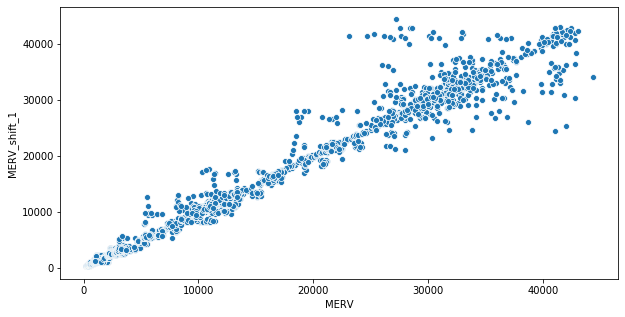


Valores del índice contra su retardo en 2 periodos


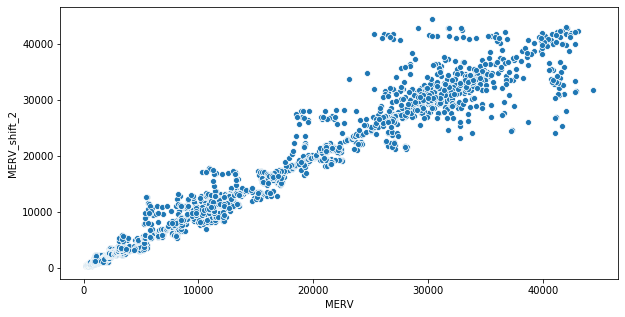


Valores del índice contra su retardo en 3 periodos


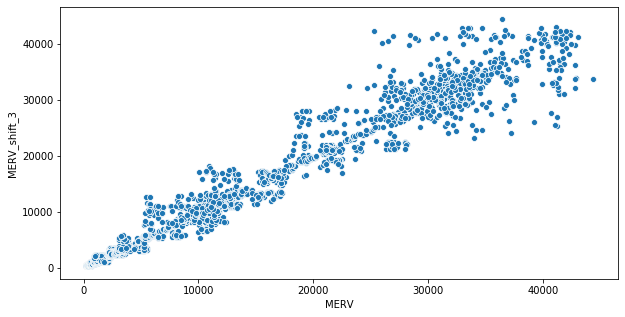


Valores del índice contra su retardo en 4 periodos


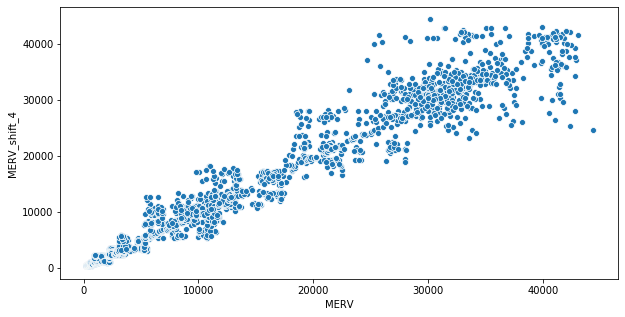

In [39]:
#Diagramas de dispersión
for i in range(1,5):
    print('Valores del índice contra su retardo en {} periodos'.format(i))
    ax = sns.scatterplot(x="MERV", y=df_retardo.columns[i], data=df_retardo)
    plt.show()
    print()

10) Grafique e interprete las funciones de autocorrelación (ACF) y autocorrelación parcial (PACF). El siguiente [link](https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/) puede ser útil para una primera aproximación.

Función de autocorrelación y autocorrelación parcial para el índice MERV.


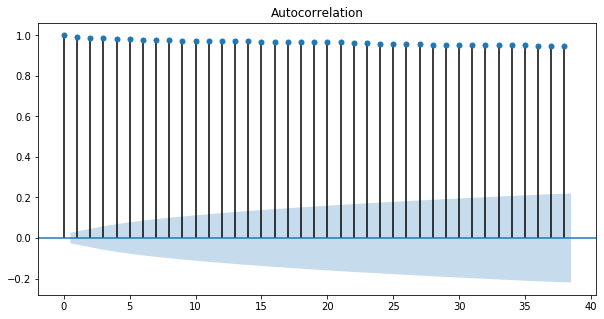

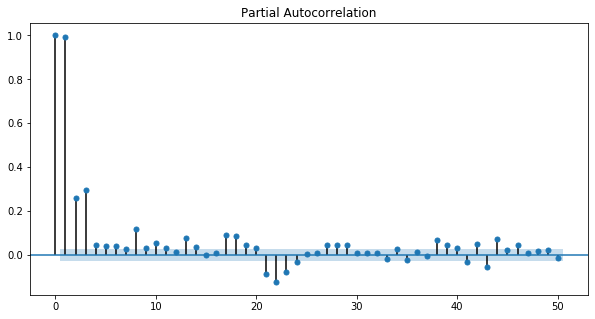

Función de autocorrelación y autocorrelación parcial para el índice BVSP.


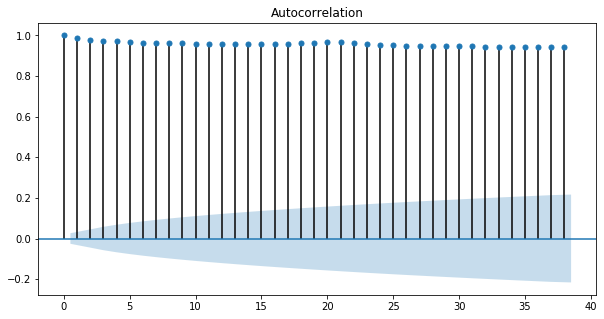

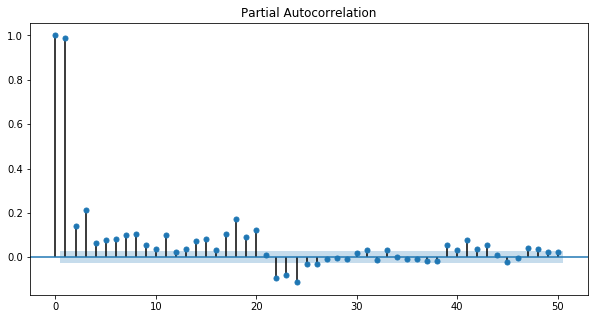

Función de autocorrelación y autocorrelación parcial para el índice GSPC.


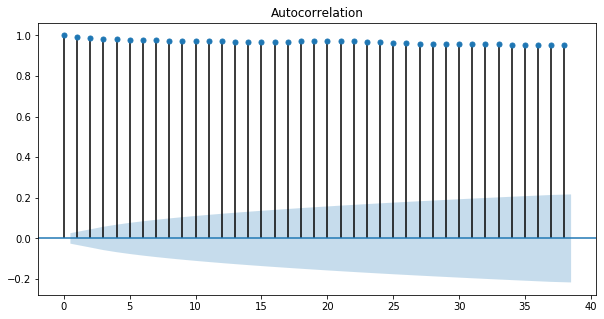

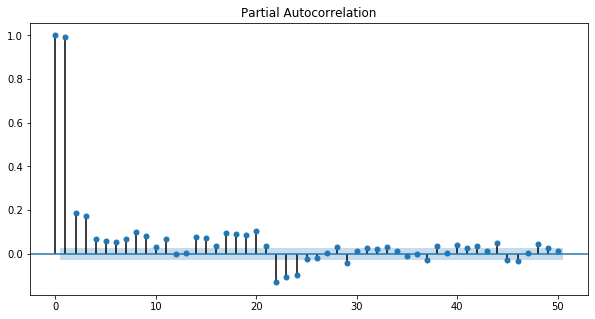

Función de autocorrelación y autocorrelación parcial para el índice NDX.


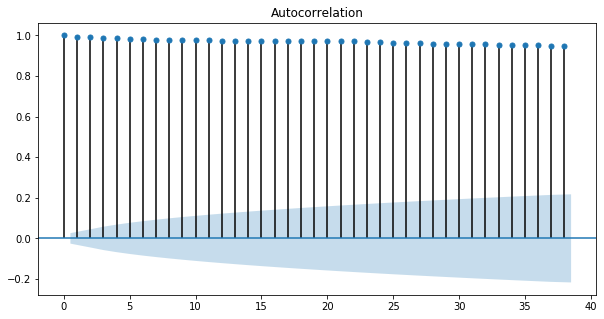

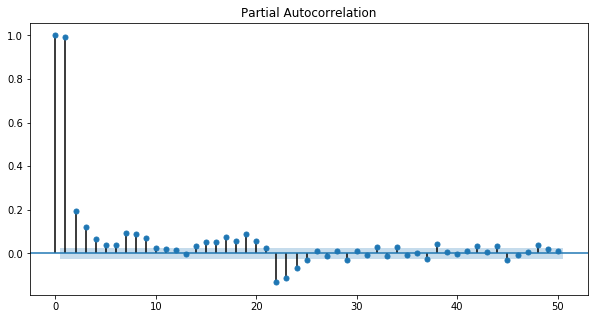

Función de autocorrelación y autocorrelación parcial para el índice FTSE.


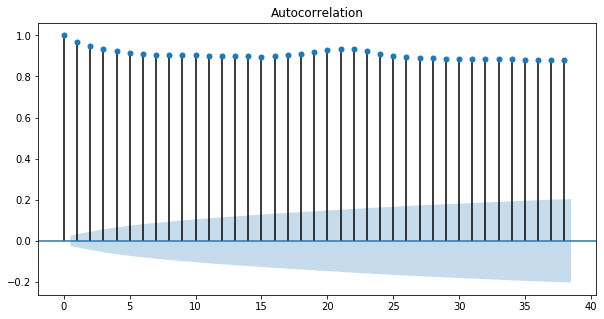

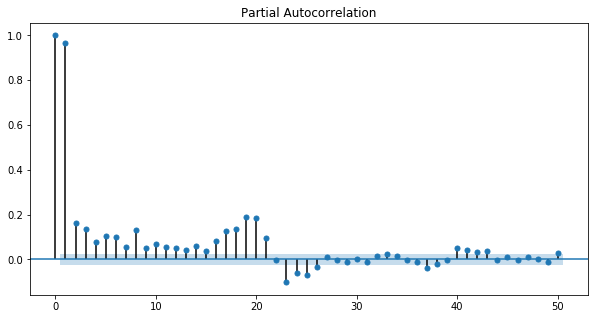

Función de autocorrelación y autocorrelación parcial para el índice GDAXI.


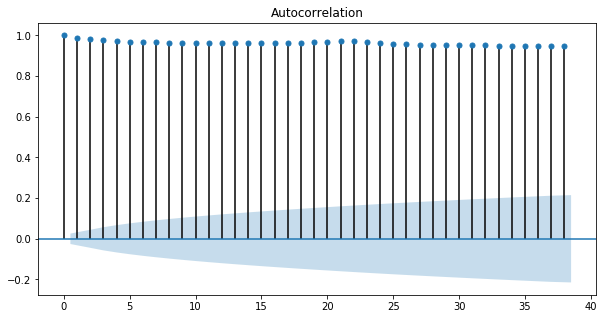

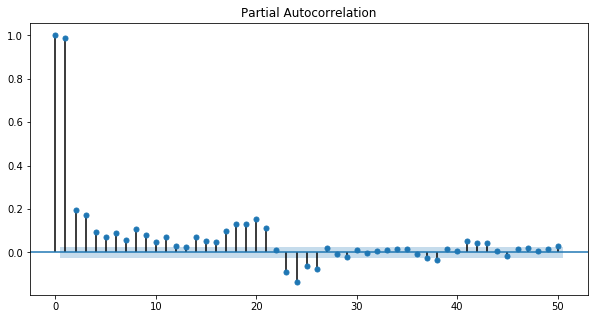

Función de autocorrelación y autocorrelación parcial para el índice FCHI.


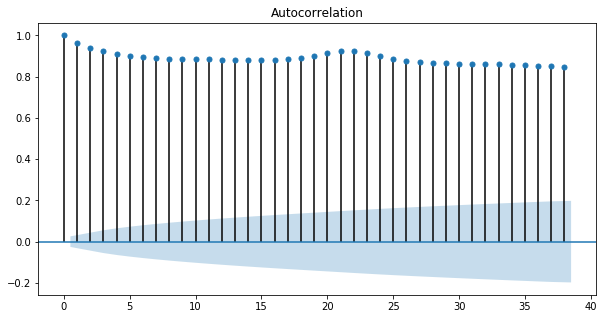

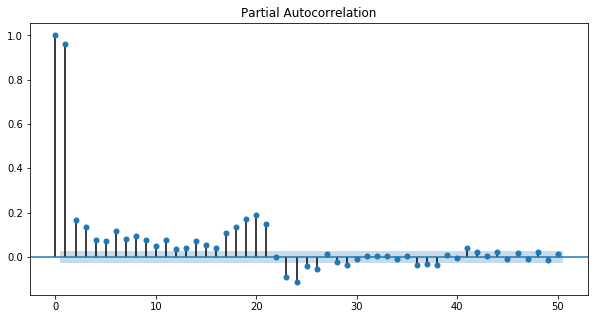

Función de autocorrelación y autocorrelación parcial para el índice N225.


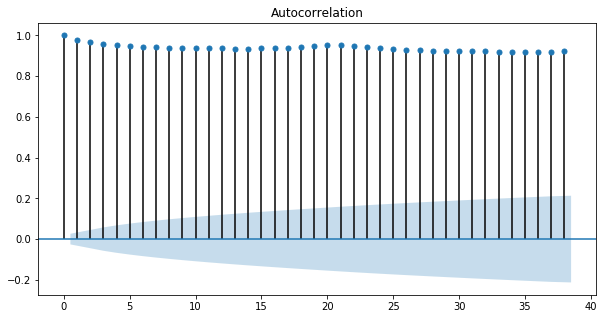

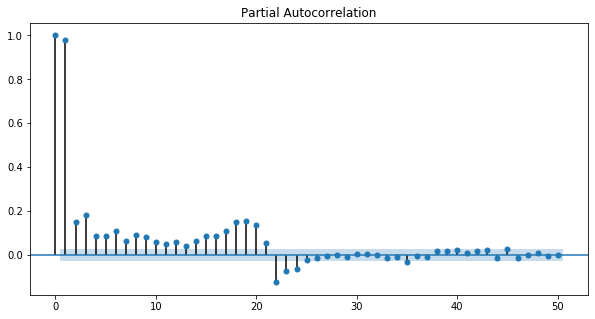

Función de autocorrelación y autocorrelación parcial para el índice HSI.


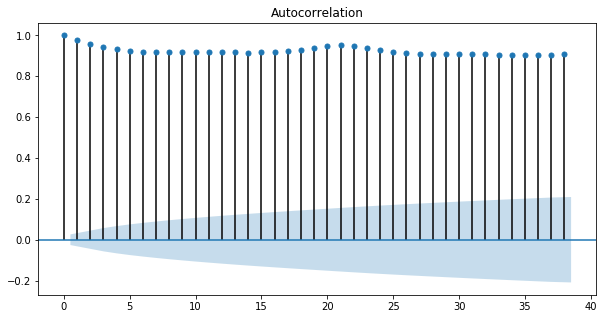

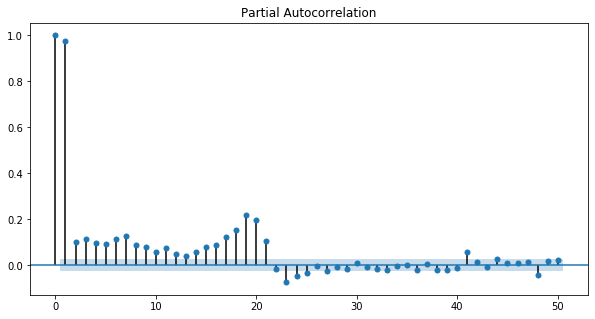

Función de autocorrelación y autocorrelación parcial para el índice SSEC.


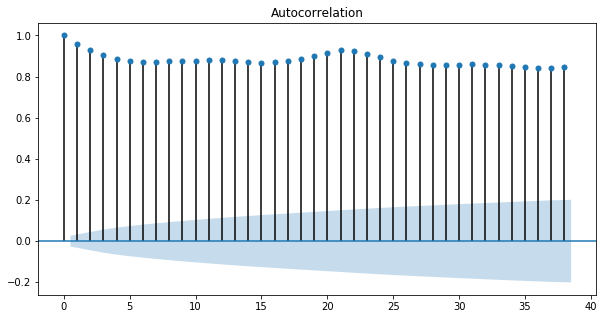

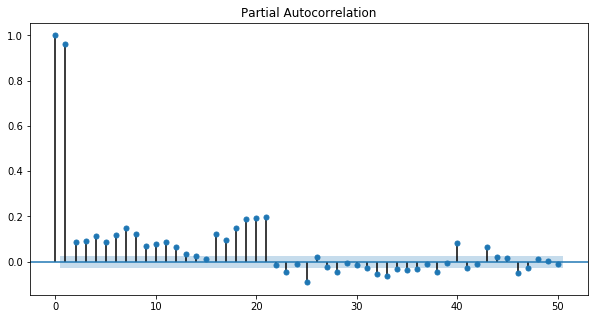

Función de autocorrelación y autocorrelación parcial para el índice BSESN.


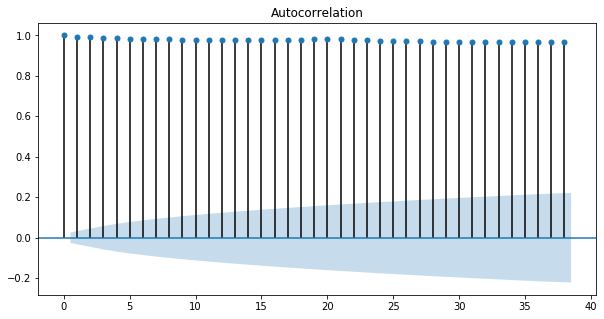

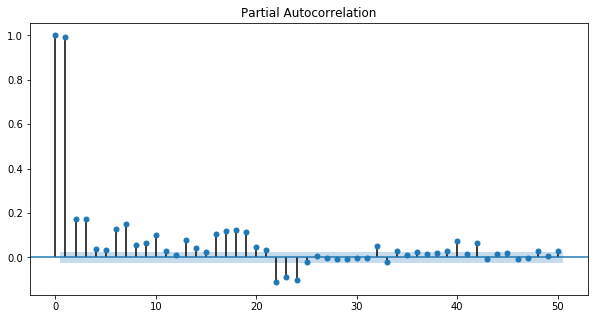

In [53]:
#Sería bueno poner los gráficos de acf y pacf de cada índice al lado (aun no pude😱)
for indice in df.columns.drop(['YEAR', 'YEAR_SEGMENT']):
    print('Función de autocorrelación y autocorrelación parcial para el índice {}.'.format(indice))
    series = df[indice].dropna()
    plot_acf(series)
    plt.show()
    
    plot_pacf(series, lags=50)
    plt.show()

## Conclusiones